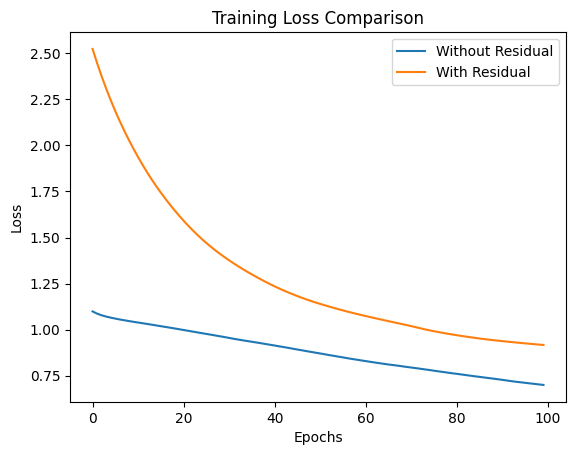

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Simulated dataset
torch.manual_seed(42)
x = torch.randn(100, 10)  # Input features
y = torch.randn(100, 10)  # Target output

# Model without residual connections
class WithoutResidual(nn.Module):
    def __init__(self, input_dim):
        super(WithoutResidual, self).__init__()
        self.fc1 = nn.Linear(input_dim, input_dim)
        self.fc2 = nn.Linear(input_dim, input_dim)
        self.fc3 = nn.Linear(input_dim, input_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model with residual connections
class WithResidual(nn.Module):
    def __init__(self, input_dim):
        super(WithResidual, self).__init__()
        self.fc1 = nn.Linear(input_dim, input_dim)
        self.fc2 = nn.Linear(input_dim, input_dim)
        self.fc3 = nn.Linear(input_dim, input_dim)
    
    def forward(self, x):
        residual = x
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x)) + residual  # Add residual here
        x = self.fc3(x) + residual  # Add residual here
        return x

# Training function
def train_model(model, x, y, epochs=100, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# Initialize models
model_without = WithoutResidual(input_dim=10)
model_with = WithResidual(input_dim=10)

# Train both models
losses_without = train_model(model_without, x, y)
losses_with = train_model(model_with, x, y)

# Plot losses
plt.plot(losses_without, label="Without Residual")
plt.plot(losses_with, label="With Residual")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()
